In [ ]:
| pvm         | data        | tekijä   |
| ---------   | -------     | -------- |
| 2019-02-19  | [Opintotuen saajat ja maksetut tuet](https://beta.avoindata.fi/data/fi/dataset/opintotuen-saajat-ja-maksetut-tuet) | Markus Kainu |


# Käyttöesimerkkejä: Opintotuen saajat ja maksetut tuet

## Resurssien lataaminen

In [1]:
from ckanapi import RemoteCKAN
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from pandas.io.json import json_normalize

ua = 'avoindata_ckanapi_example/1.0 ({0})'
ckan = RemoteCKAN('https://beta.avoindata.fi/data/fi/', user_agent=ua)
packages = ckan.action.package_search(q='Kansaneläkelaitos', fq = 'title:opintotuen')
resources = packages['results'][0]['resources'] 
url_csv = resources[0]['url']
url_json = resources[1]['url']
dat = pd.read_csv(url_csv, sep = ';', decimal = ',')

In [2]:
response = urlopen(url_json)
meta = json.loads(response.read())

## Datan ja metadatan kuvailu

**Datan kuvaustieto**

In [3]:
print(meta['description'])

Raportilla on tiedot opintotuen saajista, maksetuista tuista ja keskimääräisistä tuista tilastointijakson aikana. Opintotuen saajia ovat opintorahaa, asumislisää tai opintolainan valtiontakauksen saaneet henkilöt. Maksettuihin tukiin on tilastoitu säännöllisten tai takautuvien maksujen lisäksi myös opintoetuuksien palautukset. Keskimääräiseen opintotukeen (euroa/saaja) on tilastoitu ainoastaan säännöllisesti maksetut tuet ja opintolainan valtiontakauksen euromäärä. Opintotuen saajat ja maksetut etuudet tilastoidaan kalenterivuosittain, lukuvuosittain ja kuukausittain. Lukuvuosi alkaa elokuun alussa ja päättyy seuraavan vuoden heinäkuun lopussa. Oppilaitosaste määräytyy etuuden maksutapahtumaan liittyvän oppilaitosnumeron perusteella. Oletusarvoisesti opintotuen saaja tilastoituu tilastointijakson viimeisimmän maksutapahtuman mukaiseen oppilaitosasteeseen. Valinnalla 'Astetiedon peruste: Kaikki oppilaitokset' tuen saaja tilastoituu kaikkiin tilastointijakson maksutapahtumien mukaisiin o

**Datan muuttujatieto**

In [4]:
json_normalize(meta['resources'][0]['schema']['fields'])

,format,name,type
0,default,vuosi,integer
1,default,etuus,string
2,default,kunta,string
3,default,saajat,integer
4,default,maksetut_etuudet_euroa,number
5,default,euroa_per_saaja,number


**Datan ensimmäiset rivit**

In [57]:
print(dat.head())

   kuntanumero      kunta   vuosi      etuus  saajat maksetut_etuudet_euroa  \
0          5.0   Alajärvi  2007.0  Kuntoutus   210.0              495806,49   
1          9.0  Alavieska  2007.0  Kuntoutus    41.0              143525,14   
2         10.0     Alavus  2007.0  Kuntoutus   240.0              612924,31   
3         16.0   Asikkala  2007.0  Kuntoutus   119.0              299270,66   
4         18.0     Askola  2007.0  Kuntoutus    52.0              175090,15   

  euroa_per_saaja  
0       2360,9833  
1       3500,6132  
2       2553,8513  
3       2514,8795  
4       3367,1183  


In [5]:
plotdat = (dat
 .query('vuosi == 2018')
 .query('etuus == "Opintoraha"')
 .sort_values(by='maksetut_etuudet_euroa', ascending=False)
 .head(20))

#plt.bar(plotdat, height = )

## Kuvio

<BarContainer object of 20 artists>

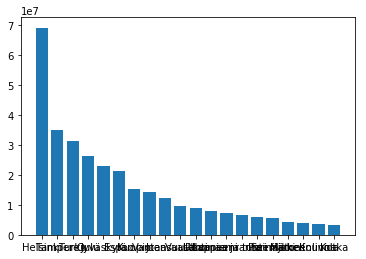

In [6]:
plt.bar(plotdat['kunta'], plotdat['maksetut_etuudet_euroa'])

## Datastore-api

Jos et tarvitse koko aineistoa, voit suodattaa siitä osio SQL:llä käyttäen CKAN:n DataStore-rajapintaa.

Alla olevassa esimerkissä tehdään rajaus `kunta`-muuttujasta ja siis etsitään vaan kuntaa *Veteli* koskevat tiedot.

In [7]:
kunta = "Veteli"
taulu = resources[0]['id']
muuttuja = 'kunta'
urli = f'https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from "{taulu}" WHERE {muuttuja} LIKE \'{kunta}\''
urli_plain = f'https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from "{taulu}"'
#urli = "https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from \"%s\" WHERE %s LIKE '%s'" % (taulu, muuttuja, kunta)
#urli_plain = "https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from \"%s\"" % (taulu)
response = urlopen(urli_plain)
da = json.loads(response.read())
dataa = json_normalize(da['result']['records'])
#dataa
print(dataa.head())

                                          _full_text  _id     etuus  \
0  '2018':1 '3674':7 '414':4 '432023':5 '4617':8 ...    1  Yhteensä   
1  '1617':8 '2018':1 '3024':7 '305':4 '327333':5 ...    2  Yhteensä   
2  '118497':5 '2018':1 '3919':7 '4614':8 '81':6 '...    3  Yhteensä   
3  '2018':1 '3532':7 '446':4 '50':6 '525543':5 '7...    4  Yhteensä   
4  '2018':1 '246':4 '254566':5 '3318':7 '8347':8 ...    5  Yhteensä   

  euroa_per_saaja      kunta maksetut_etuudet_euroa saajat vuosi  
0       3674,4617       Akaa              432023,71    414  2018  
1       3024,1617   Alajärvi              327333,55    305  2018  
2       3919,4614  Alavieska              118497,81     87  2018  
3       3532,7264     Alavus              525543,50    446  2018  
4       3318,8347   Asikkala              254566,97    246  2018  
